In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [2]:
df = pd.read_csv('framingham.csv')

In [3]:
df.head(15)
#There are no unique values for each row (useless).

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

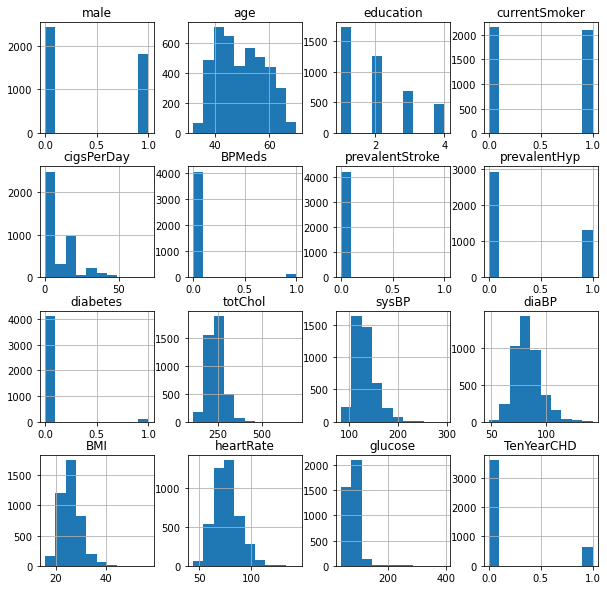

In [5]:
df.hist(figsize=(10,10))
#There are no outliers.

### Education is not important information for our prediction

In [6]:
df.drop(['education'],axis=1,inplace=True)


In [7]:
df.head(15)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


### Finding Null values and replacing them


In [8]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
df['cigsPerDay']

0        0.0
1        0.0
2       20.0
3       30.0
4       23.0
        ... 
4235    20.0
4236    15.0
4237     0.0
4238     0.0
4239    30.0
Name: cigsPerDay, Length: 4240, dtype: float64

In [10]:
a = np.mean(df['cigsPerDay'])
print(a)

9.005936832106388


In [11]:
df['BPMeds']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4235    NaN
4236    0.0
4237    0.0
4238    0.0
4239    0.0
Name: BPMeds, Length: 4240, dtype: float64

In [12]:
b = np.mean(df['BPMeds'])
print(b)


0.029615476474802963


In [13]:
df['totChol']

0       195.0
1       250.0
2       245.0
3       225.0
4       285.0
        ...  
4235    248.0
4236    210.0
4237    269.0
4238    185.0
4239    196.0
Name: totChol, Length: 4240, dtype: float64

In [14]:
c = np.mean(df['totChol'])
print(c)

236.69952267303103


In [15]:
df['BMI']

0       26.97
1       28.73
2       25.34
3       28.58
4       23.10
        ...  
4235    22.00
4236    19.16
4237    21.47
4238    25.60
4239    20.91
Name: BMI, Length: 4240, dtype: float64

In [16]:
d = np.mean(df['BMI'])
print(d)

25.800800758114182


In [17]:
df['heartRate']

0       80.0
1       95.0
2       75.0
3       65.0
4       85.0
        ... 
4235    84.0
4236    86.0
4237    80.0
4238    67.0
4239    85.0
Name: heartRate, Length: 4240, dtype: float64

In [18]:
e = np.mean(df['heartRate'])
print(e)
##80

75.87898089171975


In [19]:
df['glucose']

0        77.0
1        76.0
2        70.0
3       103.0
4        85.0
        ...  
4235     86.0
4236      NaN
4237    107.0
4238     72.0
4239     80.0
Name: glucose, Length: 4240, dtype: float64

In [20]:
m = np.mean(df['glucose'])
print(m)

81.96365524402907


In [21]:
df["glucose"].replace(to_replace = np.nan, value =m , inplace=True)
df["BMI"].replace(to_replace = np.nan, value = d, inplace=True)
df["cigsPerDay"].replace(to_replace = np.nan, value = 9.0, inplace=True)
df["heartRate"].replace(to_replace = np.nan, value = 85.0, inplace=True)
df["totChol"].replace(to_replace = np.nan, value = 237.0, inplace=True)
df['BPMeds'].replace(to_replace = np.nan, value = b, inplace=True)




In [22]:
df.isnull().sum()
#No null values.

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Variable Transformation

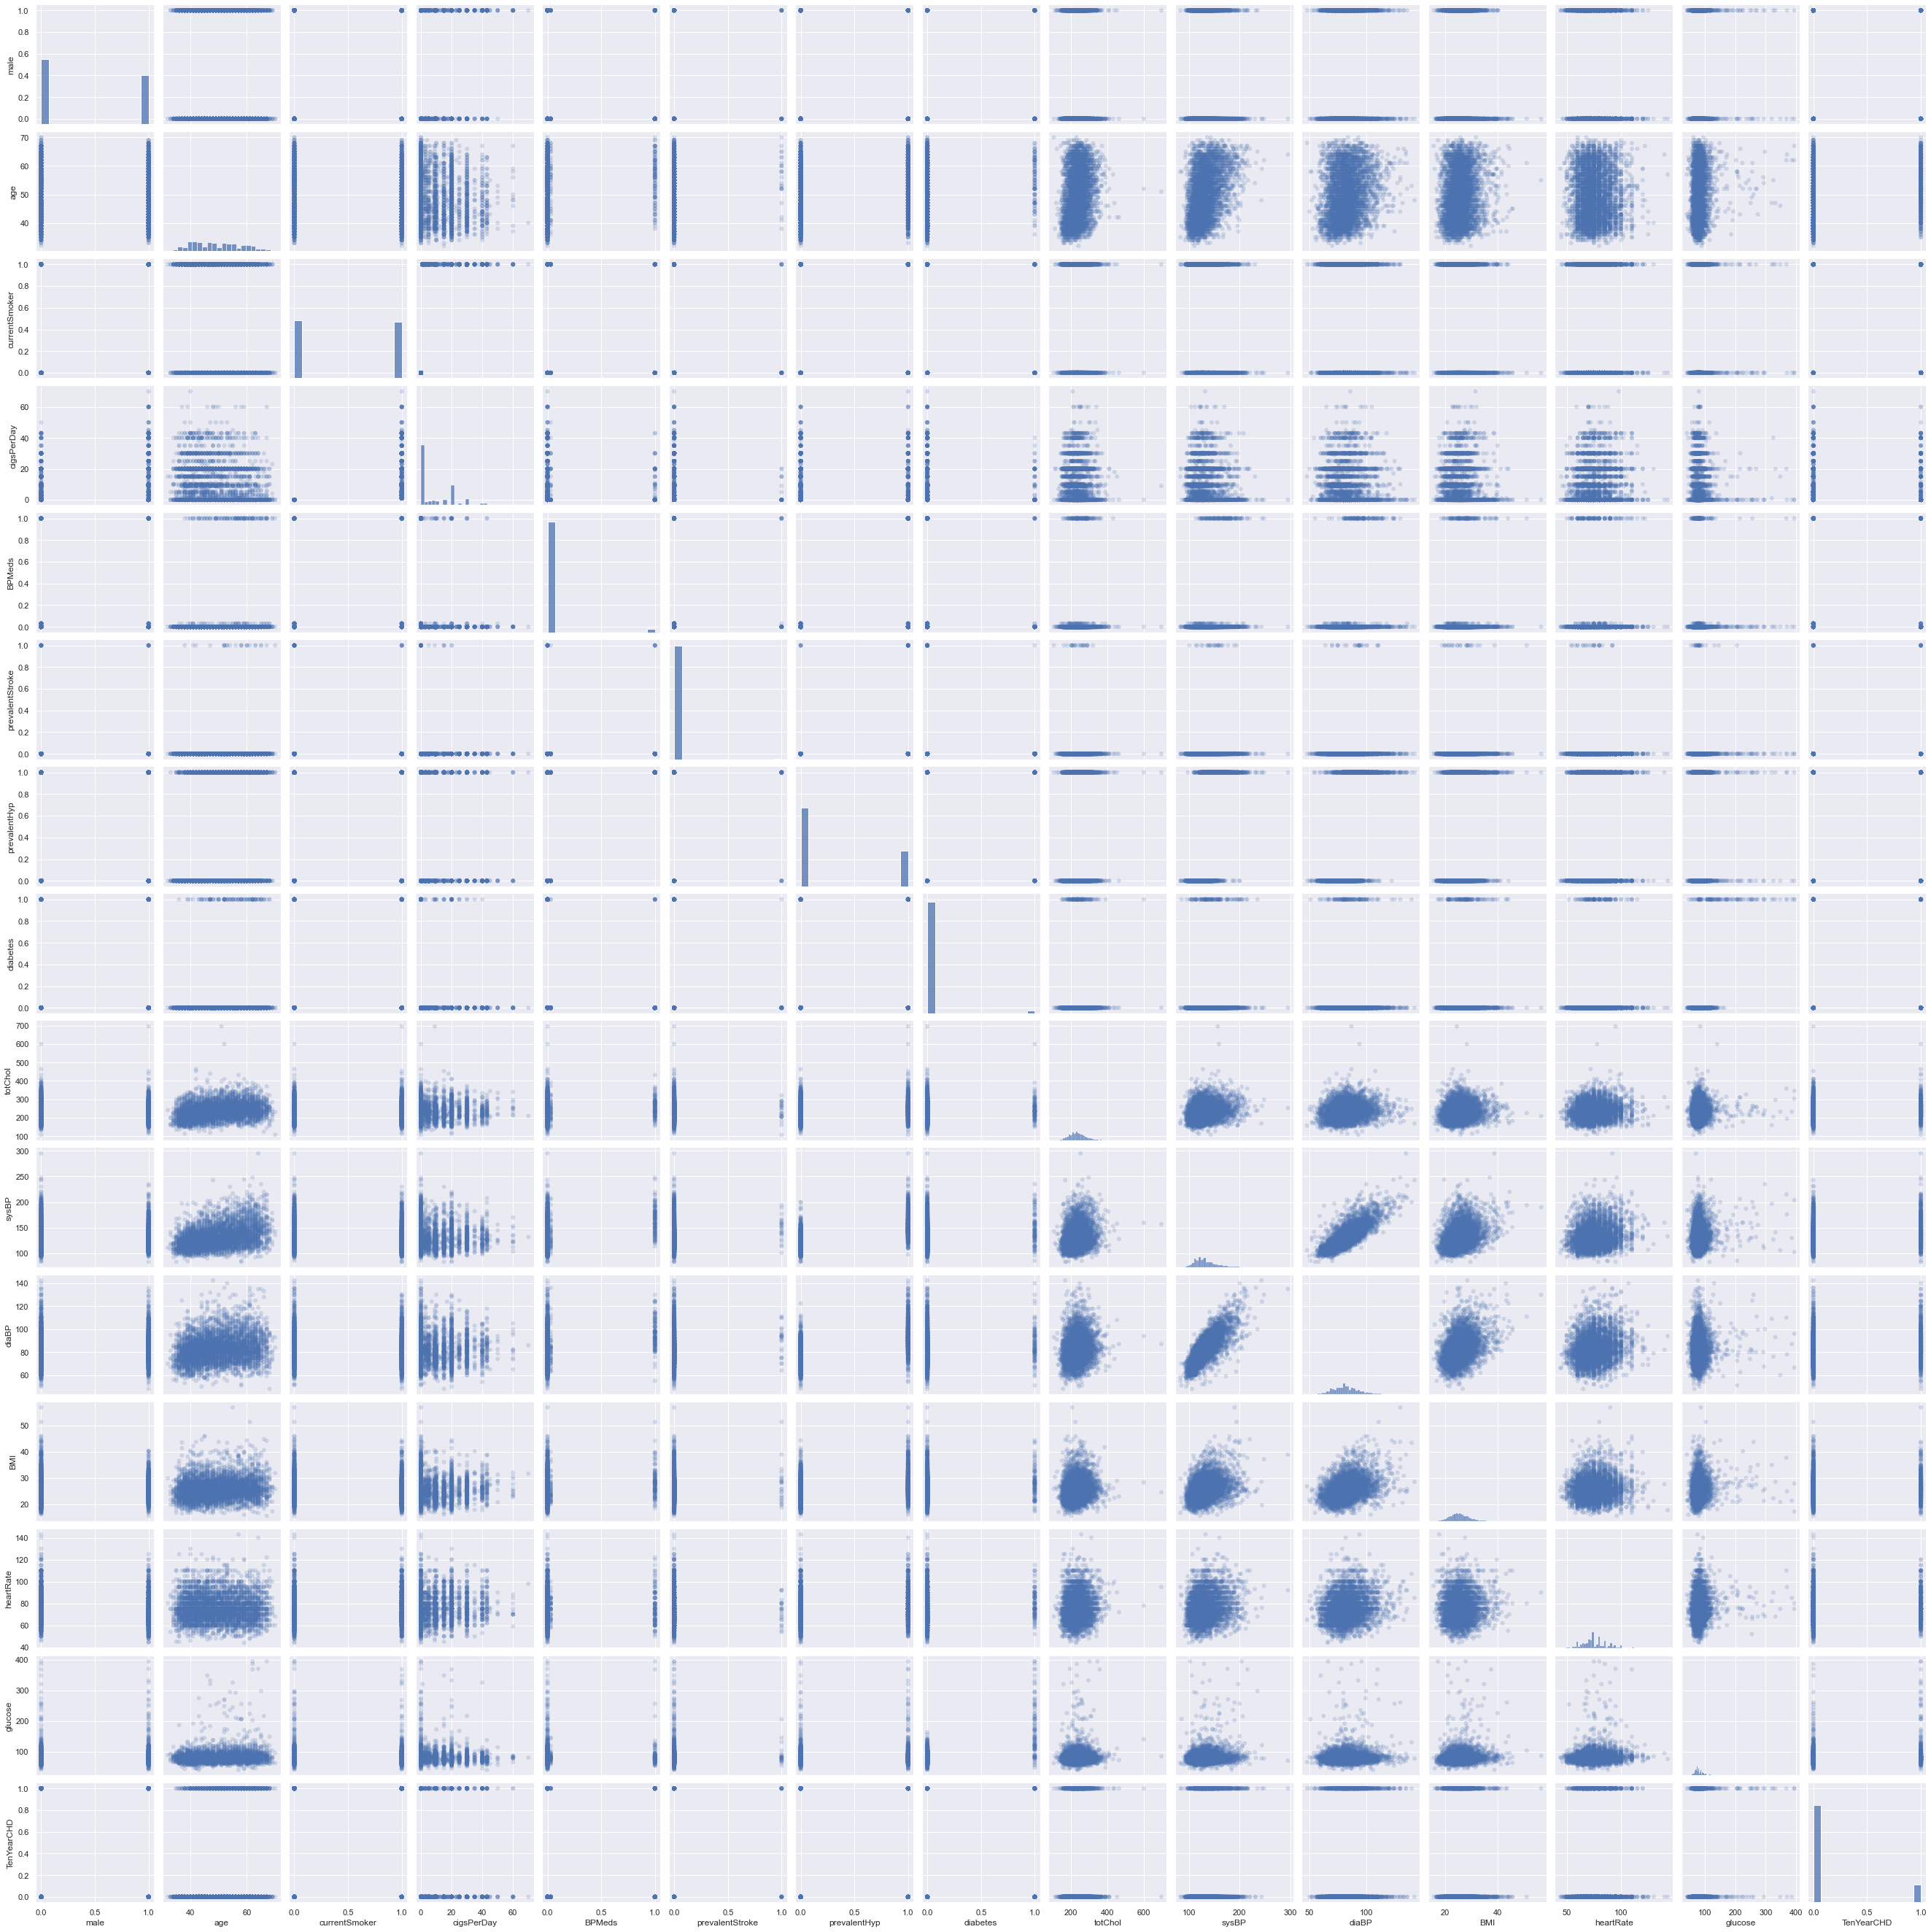

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.pairplot(df, plot_kws=dict(alpha=.2, edgecolor='none')) #what are these plots give us about the distribution of our target.
#in relations with our target there are no curves so no need to polynomial transformation.


### Fixing skewed data

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='glucose', ylabel='Density'>

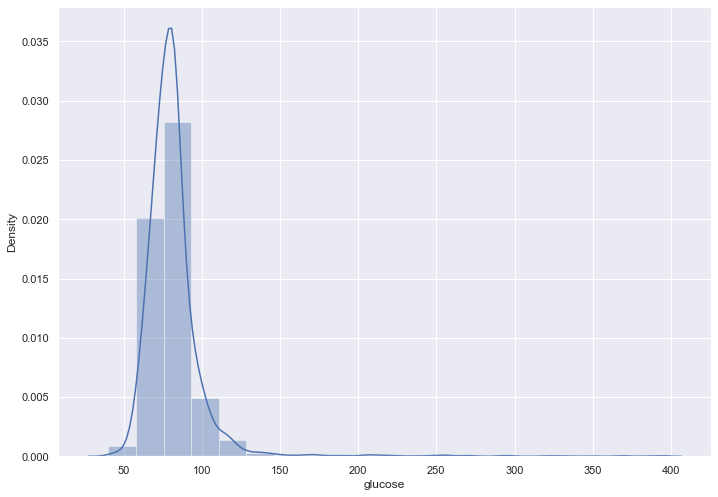

In [24]:
sns.distplot(df['glucose'],bins=20)

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diabetes', ylabel='Density'>

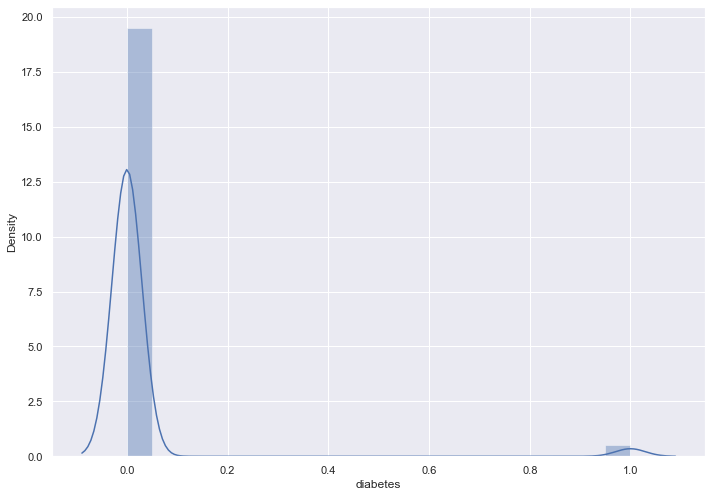

In [25]:
sns.distplot(df['diabetes'],bins=20)

In [26]:
#Not so much skewed they are normal so no need for log transformation.

### Splitting the data.

In [27]:
X=df.drop("TenYearCHD",axis=1) #FEATURES
y=df["TenYearCHD"].values #LABELS
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=15)


### Training the Model

In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score




C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Accuracy Score:

In [30]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8655660377358491
Precision Score : 0.6923076923076923
Recall Score : 0.07563025210084033
F1 Score : 0.13636363636363635
Confusion Matrix : 
[[725   4]
 [110   9]]


In [31]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8655660377358491